# Simple DFT

In [1]:
import numpy as np

def simple_dft(signal):
    # Get the number of samples in the signal
    N = len(signal)
    
    # Initialize an empty list to store the result (DFT coefficients)
    res = []
    
    # Iterate over each frequency bin (k)
    for k in range(N):
        # Initialize the current DFT coefficient for the given frequency bin
        cur_value = 0
        
        # Iterate over each sample in the signal (j)
        for j in range(N):
            # Calculate the complex exponential term and accumulate
            cur_value += signal[j] * np.exp(-2 * np.pi * 1j * j * k / N)
        
        # Append the result for the current frequency bin to the list
        res.append(np.round(cur_value, 5))
    
    # Return the list of DFT coefficients
    return res

simple_dft([1, 2, 0, 5, 9, 2, 0, 4])

[(23+0j),
 (-8.70711-0.70711j),
 (10+5j),
 (-7.29289-0.70711j),
 (-3-0j),
 (-7.29289+0.70711j),
 (10-5j),
 (-8.70711+0.70711j)]

In [2]:
# Compute the FFT using NumPy's fft function
a = np.fft.fft([1, 2, 0, 5, 9, 2, 0, 4])

# Compute the DFT using our simple_dft function
b = simple_dft([1, 2, 0, 5, 9, 2, 0, 4])

# Check if the results are element-wise close within a tolerance
print(np.allclose(a, b))

True


In [11]:
import time

start = time.time()
simple_dft([1, 2, 0, 5, 9, 2, 0, 4])
print("it took %fs"%(time.time() - start))

start = time.time()
np.fft.fft([1, 2, 0, 5, 9, 2, 0, 4])
print("it took %fs"%(time.time() - start))

it took 0.000463s
it took 0.000166s


# FFT

In [38]:
import numpy as np

def nice_fft(signal):
    # Get the number of samples in the signal
    N = len(signal)
    
    # Base case: if the signal has only 1 samples, use simple_dft
    if N == 1:
        return simple_dft(signal)
    else:
        # Initialize an empty list to store the result (DFT coefficients)
        res = []
        
        # Separate the signal into even and odd terms
        even_terms = signal[::2]
        odd_terms = signal[1::2]
        
        # Recursively compute FFT for even and odd terms
        f1 = nice_fft(even_terms)
        f2 = nice_fft(odd_terms)
        
        # Combine the results using the Cooley-Tukey FFT algorithm
        for k in range(N):
            # Calculate the complex exponential term
            mult = np.exp(-2 * np.pi * 1j * k / N)
            # Determine the index for the even and odd terms
            INDEX = (k % int(N / 2))
            # Combine the results for the current frequency bin
            dft_value = f1[INDEX] + mult * f2[INDEX]
            # Append the result for the current frequency bin to the list
            res.append(np.round(dft_value, 5))
        
        # Return the list of DFT coefficients
        return res

nice_fft([1, 2, 0, 5, 9, 2, 0, 4])

[(23+0j),
 (-8.70711-0.70711j),
 (10+5j),
 (-7.29289-0.70711j),
 (-3-0j),
 (-7.29289+0.70711j),
 (10-5j),
 (-8.70711+0.70711j)]

In [48]:
import timeit

# Generate a random array of size 2^14 (16384)
random_array = np.random.rand(2**14)

# Measure the execution time for simple_dft
time_simple_dft = timeit.timeit(lambda: simple_dft(random_array), number=1)

# Measure the execution time for nice_fft
time_nice_fft = timeit.timeit(lambda: nice_fft(random_array), number=1)

# Print the results
print(f"Time taken for simple_dft: {time_simple_dft:.5f} seconds")
print(f"Time taken for nice_fft: {time_nice_fft:.5f} seconds")

Time taken for simple_dft: 149.81244 seconds
Time taken for nice_fft: 1.28395 seconds


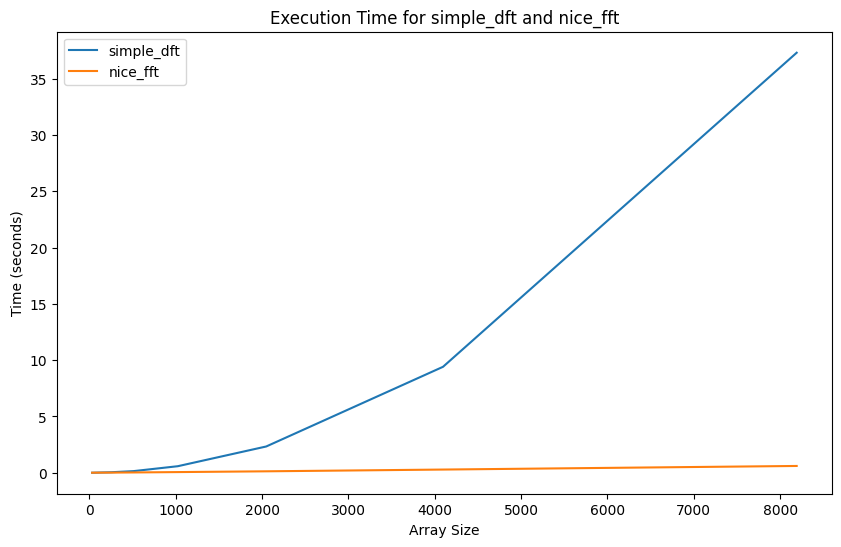

In [53]:
# Define array sizes to test
array_sizes = [2**n for n in range(5, 14)]  # Sizes from 2^5 to 2^14

# Measure execution time for each array size
time_simple_dft = []
time_nice_fft = []

for size in array_sizes:
    random_array = np.random.rand(size)
    time_simple_dft.append(timeit.timeit(lambda: simple_dft(random_array), number=1))
    time_nice_fft.append(timeit.timeit(lambda: nice_fft(random_array), number=1))

# Plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(array_sizes, time_simple_dft, label='simple_dft')
plt.plot(array_sizes, time_nice_fft, label='nice_fft')
plt.xlabel('Array Size')
plt.ylabel('Time (seconds)')
plt.title('Execution Time for simple_dft and nice_fft')
plt.legend()
plt.show()